## <i> <span style='color:red'>KNN-GLASS DATA</i></span>

### PROBLEM STATMENT: Prepare a model for glass classification using KNN

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the input csv file
data_glass=pd.read_csv("glass.csv")
data_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Checking for the null values and data types of the input data
data_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: ylabel='Count'>

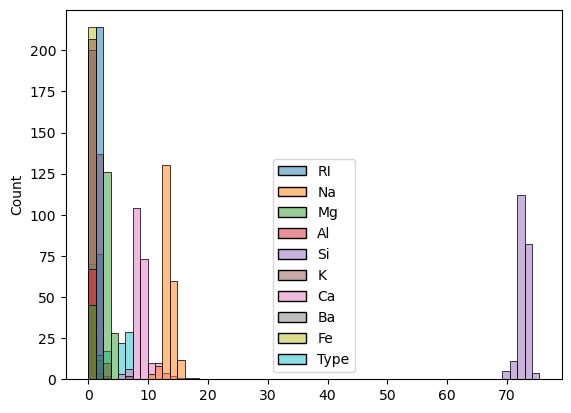

In [4]:
sns.histplot(data_glass)

In [5]:
# Extracting the independent and dependent variables from the input dataset
x=data_glass.iloc[:,0:9]
y=data_glass.iloc[:,9]

<Axes: xlabel='Type', ylabel='Density'>

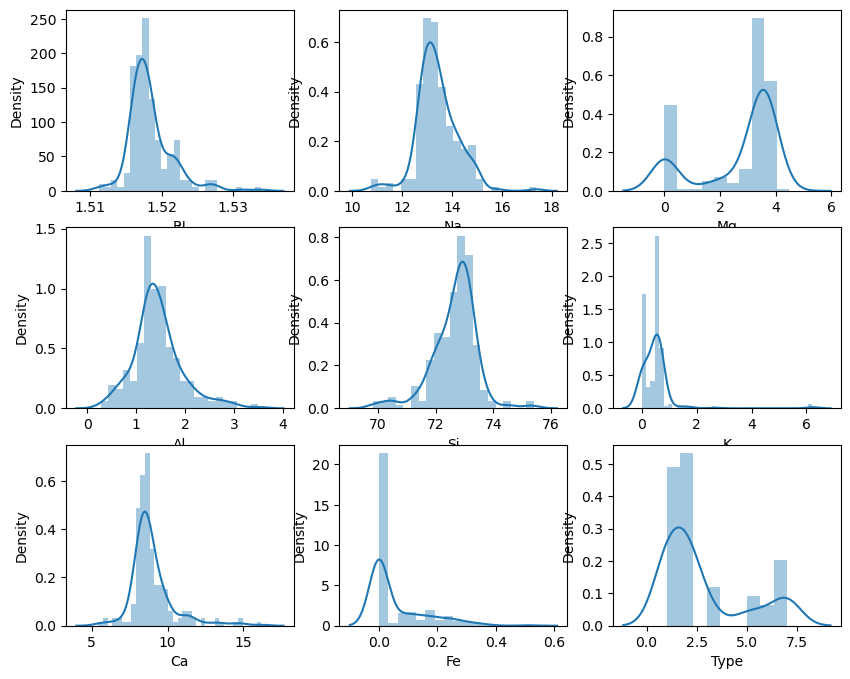

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.distplot(data_glass.RI)
plt.subplot(3,3,2)
sns.distplot(data_glass.Na)
plt.subplot(3,3,3)
sns.distplot(data_glass.Mg)
plt.subplot(3,3,4)
sns.distplot(data_glass.Al)
plt.subplot(3,3,5)
sns.distplot(data_glass.Si)
plt.subplot(3,3,6)
sns.distplot(data_glass.K)
plt.subplot(3,3,7)
sns.distplot(data_glass.Ca)
plt.subplot(3,3,8)
sns.distplot(data_glass.Fe)
plt.subplot(3,3,9)
sns.distplot(data_glass.Type)

In [7]:
# Standardising the data to avoid variance among the features in the dataset
scale=preprocessing.StandardScaler()
x=scale.fit_transform(x)

In [8]:
# Splitting the data into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [9]:
# Constructing a KNN model, considering 4 neighbors
model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
# Predicting the model on the test data
y_pred=model1.predict(x_test)

In [11]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6744186046511628

In [12]:
# Using gridsearchCV to identify the best parameter, which gives a higher accuracy in classification
model=KNeighborsClassifier()
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [13]:
gsv=GridSearchCV(model,param_grid=param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [14]:
print((gsv.best_params_),(gsv.best_score_))

{'n_neighbors': 4} 0.7307563025210084


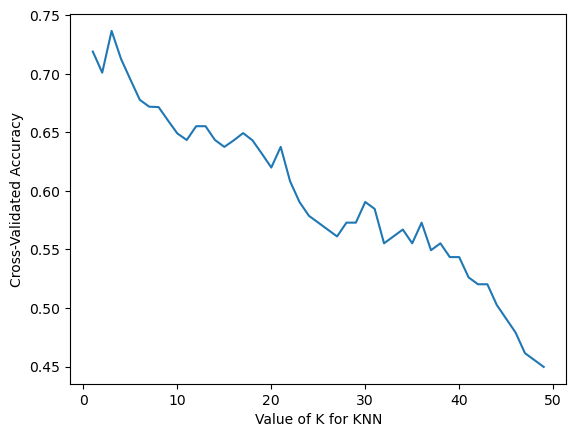

In [15]:
# Visualising different values of neighbors taken in a KNN model Vs it corresponding validation accuracy
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Inference:

### Thus, the model we constructed depicts that, it gives the highest classification accuracy for glasses, when we consider 4 neighbours in the KNN algorithm